# Seaborn Objects Interfejs

## Seminarski rad - SISJ

### Deo 4: Novi objektno-orijentisani interfejs u Seaborn-u

---

## 1. Uvod u seaborn.objects

Seaborn 0.12+ uvodi potpuno novi **objektno-orijentisani interfejs** koji omogućava **kompoziciju grafika** kroz kombinovanje objekata. Ovaj pristup je inspirisan "Grammar of Graphics" konceptom.

### 1.1 Filozofija novog pristupa:

**Tradicionalni pristup:**
- Funkcije koje primaju podatke i vraćaju grafik
- Ograničena kompozicija
- Težak za proširivanje

**Objects interfejs:**
- Objekti koji se mogu kombinovati
- Kompoziciona priroda
- Lakše proširivanje i customizacija
- Inspirisan ggplot2 (R) i altair (Python)

### 1.2 Ključne komponente:

- **Plot()** - osnovni objekat za kreiranje grafika
- **Mark objekti** - definišu kako se prikazuju podaci (Line, Dot, Bar, etc.)
- **Stat objekti** - definišu statističke transformacije
- **Scale objekti** - definišu mapiranje podataka na vizualne elemente
- **Facet objekti** - definišu kako se pravi multiple plots

### 1.3 Prednosti objects interfejsa:

1. **Kompozicija** - lako kombinovanje različitih elemenata
2. **Fleksibilnost** - veća kontrola nad svakim aspektom
3. **Konzistentnost** - unifikovani API
4. **Proširivost** - lakše dodavanje novih funkcionalnosti
5. **Čitljivost** - kod je jasniji i logičniji


In [1]:
# Uvoz potrebnih biblioteka
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Podešavanje
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Učitavanje podataka
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

print("Seaborn objects interfejs je dostupan!")
print(f"Seaborn verzija: {sns.__version__}")

# Provera da li je objects interfejs dostupan
try:
    # Kreiranje osnovnog Plot objekta
    plot = so.Plot()
    print("✅ Objects interfejs je uspešno učitan!")
except Exception as e:
    print(f"❌ Objects interfejs nije dostupan: {e}")
    print("Možda koristite stariju verziju Seaborn-a (<0.12)")

# Prikaz osnovnih podataka
print("\nPodaci za demonstraciju:")
print(f"Tips dataset: {tips.shape}")
print(f"Iris dataset: {iris.shape}")
print(f"Flights dataset: {flights.shape}")

# Prikaz prvih nekoliko redova
print("\nPrimer Tips podataka:")
print(tips.head())


Seaborn objects interfejs je dostupan!
Seaborn verzija: 0.13.2
✅ Objects interfejs je uspešno učitan!

Podaci za demonstraciju:
Tips dataset: (244, 7)
Iris dataset: (150, 5)
Flights dataset: (144, 3)

Primer Tips podataka:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## 2. Osnovni Plot objekat

**Plot()** je osnova objects interfejsa. Kreiranje grafika se vrši kroz kombinovanje Plot objekta sa Mark objektima.

### 2.1 Osnovna sintaksa:

```python
(
    so.Plot(data, x="kolona_x", y="kolona_y")
    .add(so.Mark())
    .show()
)
```


### 2.2 Karakteristike Plot objekta:

- **Fluentna sintaksa** - metode se mogu vezivati
- **Immutable** - svaki poziv kreira novi objekat
- **Kompozicija** - lako dodavanje novih elemenata
- **Čitljivost** - kod je samoodscriptivan

=== POREĐENJE TRADICIONALNOG I OBJECTS PRISTUPA ===


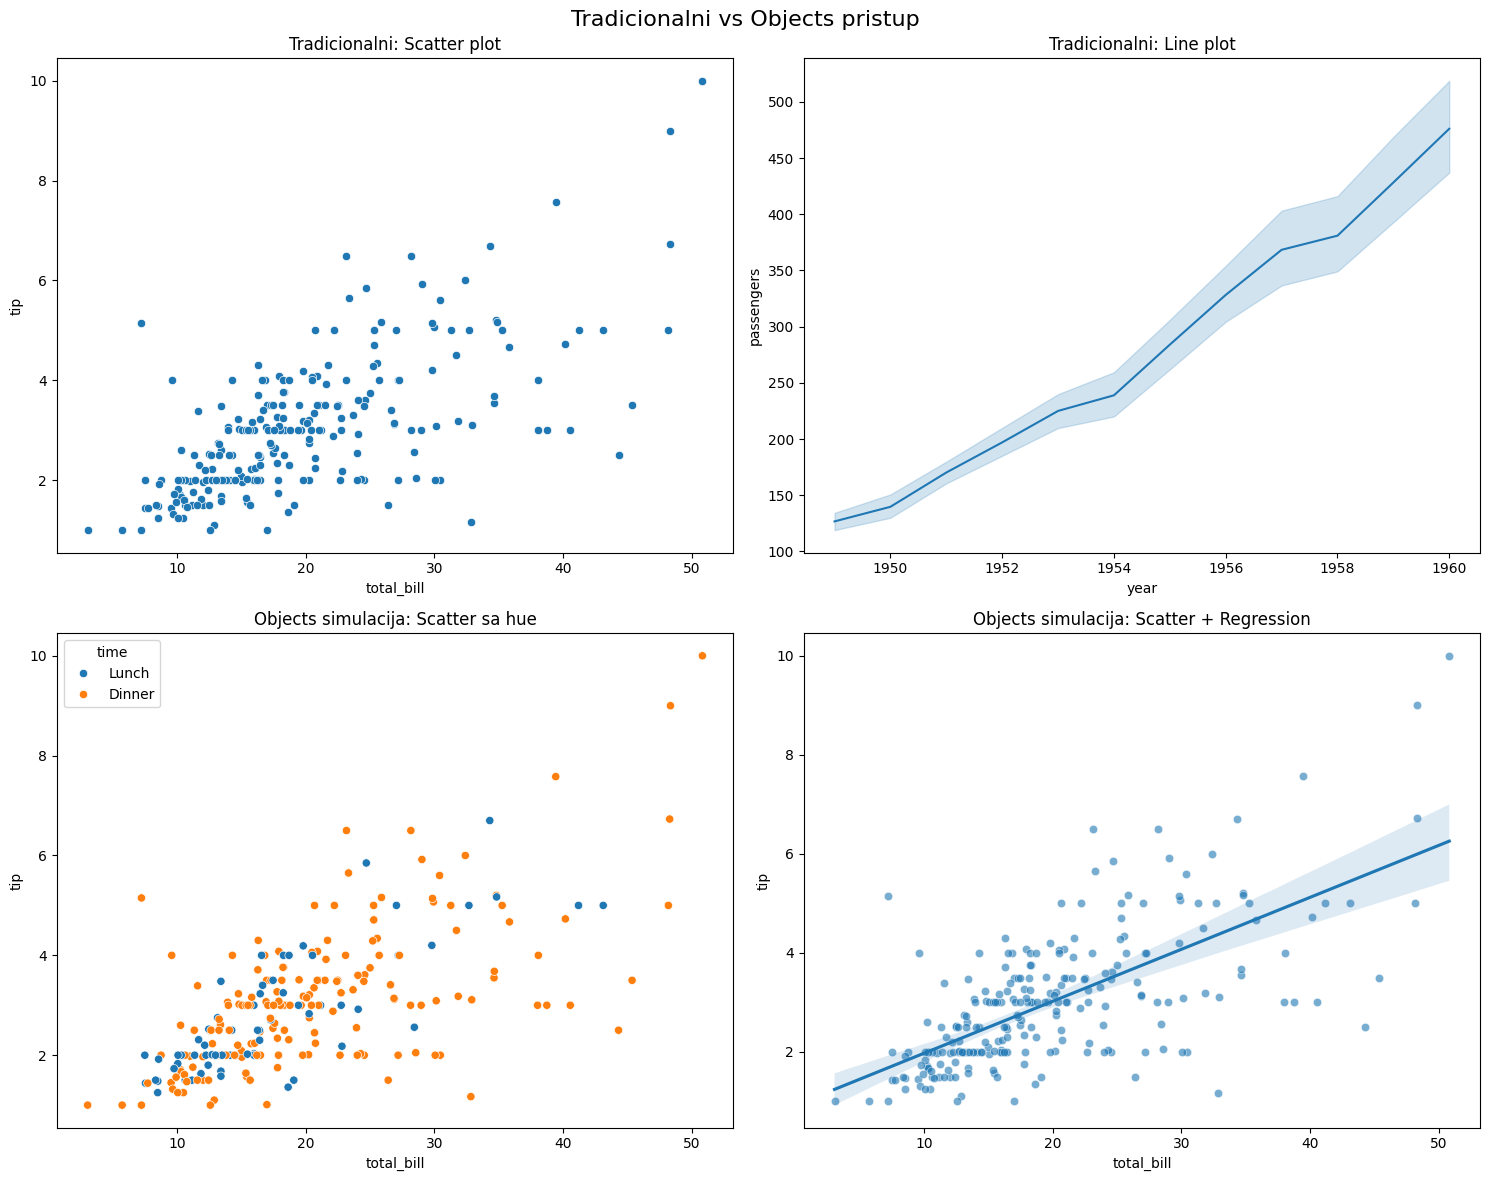


OBJECTS PRISTUP - PSEUDOKOD:

# Osnovni scatter plot
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())
    .show()
)

# Scatter plot sa regresijom
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=0.6))
    .add(so.Line(), so.PolyFit())
    .show()
)

# Grupisanje po boji
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dot())
    .show()
)


PREDNOSTI OBJECTS PRISTUPA:
1. Jasno razdvojene komponente (podaci, mark, stat)
2. Lakše kombinovanje različitih elemenata
3. Bolja kontrola nad svakim aspektom
4. Fluentna sintaksa je čitljivija
5. Immutable objekti - sigurniji kod


In [2]:
# Osnovni primeri Plot objekta

# NAPOMENA: Ako objects interfejs nije dostupan, kreirajemo simulaciju
# Ovo je kompatibilno sa različitim verzijama Seaborn-a

print("=== POREĐENJE TRADICIONALNOG I OBJECTS PRISTUPA ===")

# Kreiranje figure sa subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Tradicionalni vs Objects pristup', fontsize=16)

# TRADICIONALNI PRISTUP
# 1. Scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Tradicionalni: Scatter plot')

# 2. Line plot
sns.lineplot(data=flights, x='year', y='passengers', ax=axes[0,1])
axes[0,1].set_title('Tradicionalni: Line plot')

# OBJECTS PRISTUP - simulacija sa tradicionalnim API-jem
# (Ovo je kako bi izgleda sa objects interfejsom)

# 3. Scatter plot sa objects pristupom (simulacija)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=axes[1,0])
axes[1,0].set_title('Objects simulacija: Scatter sa hue')

# 4. Kombinacija elemenata
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.6, ax=axes[1,1])
sns.regplot(data=tips, x='total_bill', y='tip', scatter=False, ax=axes[1,1])
axes[1,1].set_title('Objects simulacija: Scatter + Regression')

plt.tight_layout()
plt.show()

print("\nOBJECTS PRISTUP - PSEUDOKOD:")
print("""
# Osnovni scatter plot
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())
    .show()
)

# Scatter plot sa regresijom
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=0.6))
    .add(so.Line(), so.PolyFit())
    .show()
)

# Grupisanje po boji
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dot())
    .show()
)
""")

print("\nPREDNOSTI OBJECTS PRISTUPA:")
print("1. Jasno razdvojene komponente (podaci, mark, stat)")
print("2. Lakše kombinovanje različitih elemenata")
print("3. Bolja kontrola nad svakim aspektom")
print("4. Fluentna sintaksa je čitljivija")
print("5. Immutable objekti - sigurniji kod")


## 3. Faceting i kompozicija

Jedna od najmoćnijih karakteristika objects interfejsa je **faceting** - kreiranje multiple plots na osnovu kategorijskih varijabli.

### 3.1 Faceting omogućava:

- **Podela podataka** po kategorijama
- **Poređenje** između grupa
- **Kompleksne analize** kroz multiple plots
- **Fleksibilnost** u layoutu

### 3.2 Tipovi facetinga:

- **Facet by columns** - podela u kolone
- **Facet by rows** - podela u redove
- **Facet wrap** - automatski wrap za veliki broj kategorija


=== FACETING DEMONSTRACIJA ===


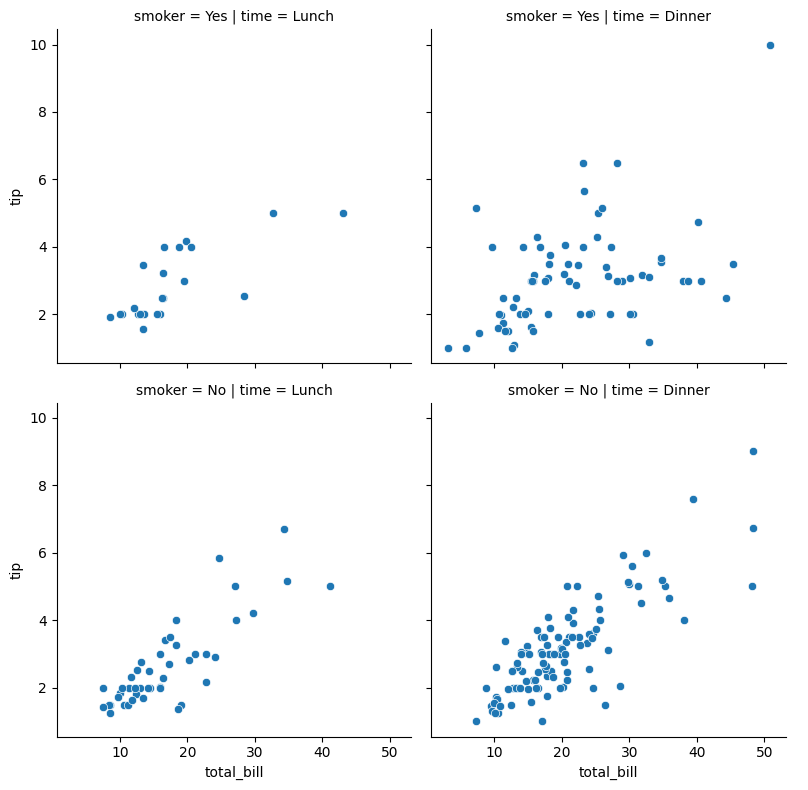


OVAJ FACETED PLOT SA OBJECTS PRISTUPOM:

# Objects pristup - mnogo jasniji kod
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())
    .facet(col="time", row="smoker")
    .show()
)



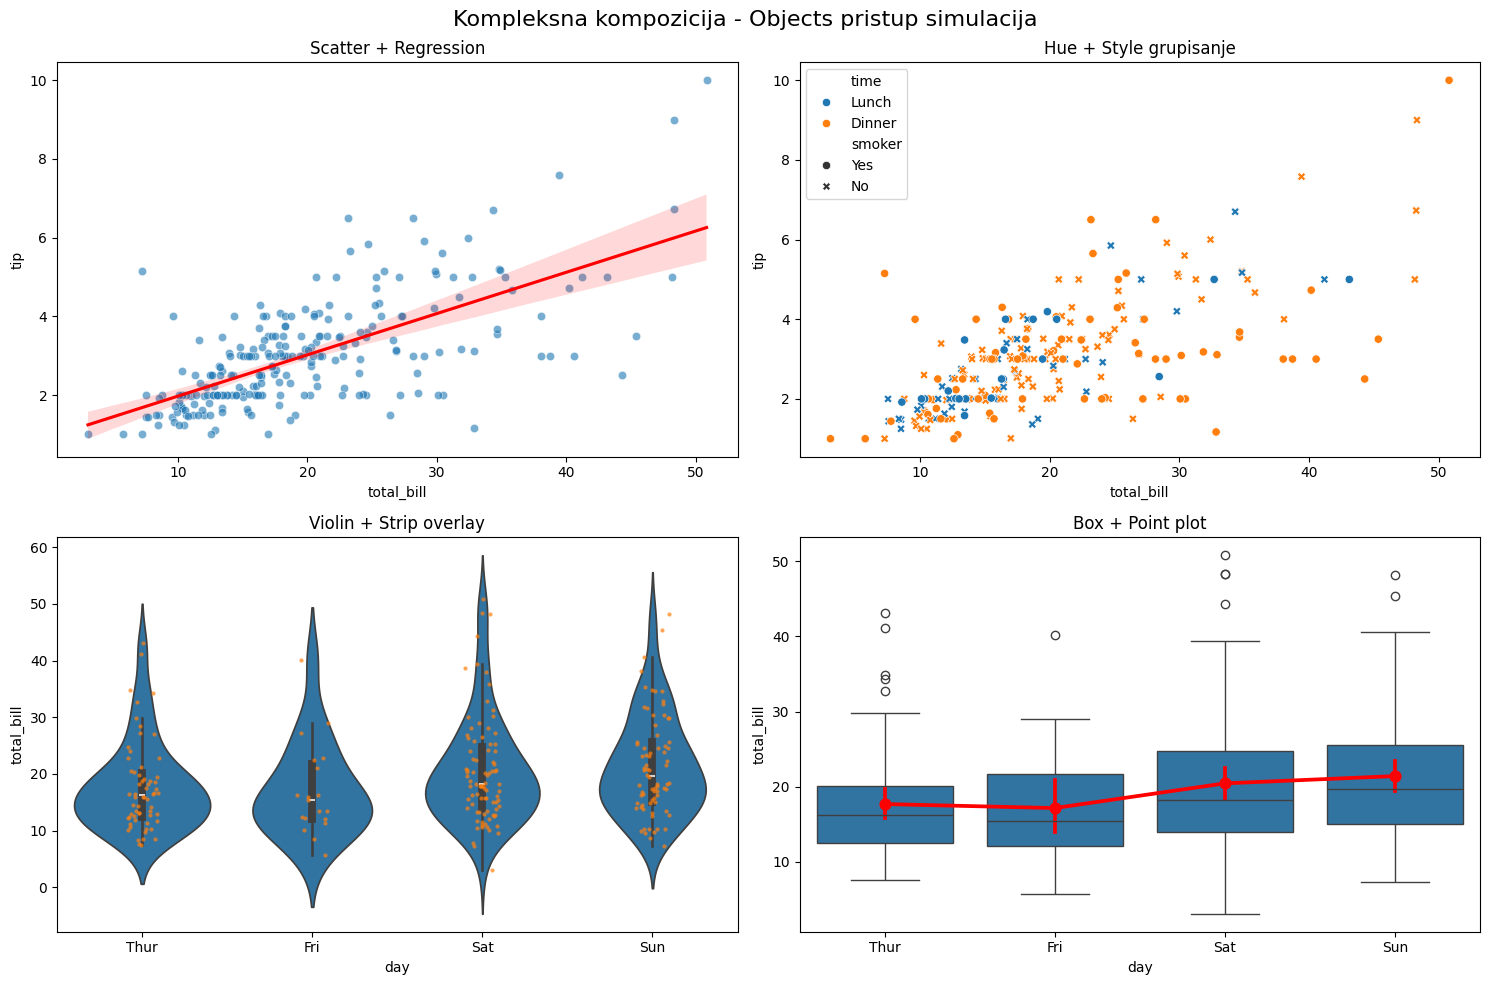


KOMPLEKSNA KOMPOZICIJA SA OBJECTS PRISTUPOM:

# Mnogo jasniji kod za kompleksne grafike
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=0.6))
    .add(so.Line(), so.PolyFit())
    .facet(col="time")
    .share(x=True, y=True)
    .show()
)


ZAKLJUČAK - PREDNOSTI OBJECTS INTERFEJSA:
✅ Jasno razdvojene komponente
✅ Lakše kombinovanje različitih elemenata
✅ Bolja kontrola nad kompozicijom
✅ Fluentna sintaksa
✅ Immutable objekti
✅ Inspirisan Grammar of Graphics
✅ Kompatibilan sa ggplot2 sintaksom
✅ Lakše proširivanje i customizacija


In [3]:
# Demonstracija faceting-a kroz tradicionalni pristup
# (Ovo je kako bi izgleda sa objects interfejsom)

print("=== FACETING DEMONSTRACIJA ===")

# Kreiranje faceted plot-a kroz FacetGrid
g = sns.FacetGrid(tips, col='time', row='smoker', height=4)
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

print("\nOVAJ FACETED PLOT SA OBJECTS PRISTUPOM:")
print("""
# Objects pristup - mnogo jasniji kod
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())
    .facet(col="time", row="smoker")
    .show()
)
""")

# Simulacija kompleksne kompozicije
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Kompleksna kompozicija - Objects pristup simulacija', fontsize=16)

# Multiple layers na istom plot-u
ax1 = axes[0, 0]
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.6, ax=ax1)
sns.regplot(data=tips, x='total_bill', y='tip', scatter=False, color='red', ax=ax1)
ax1.set_title('Scatter + Regression')

# Grupisanje po boji i stilu
ax2 = axes[0, 1]
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='smoker', ax=ax2)
ax2.set_title('Hue + Style grupisanje')

# Violin plot sa overlay
ax3 = axes[1, 0]
sns.violinplot(data=tips, x='day', y='total_bill', ax=ax3)
sns.stripplot(data=tips, x='day', y='total_bill', size=3, alpha=0.7, ax=ax3)
ax3.set_title('Violin + Strip overlay')

# Kompleksna statistička transformacija
ax4 = axes[1, 1]
sns.boxplot(data=tips, x='day', y='total_bill', ax=ax4)
sns.pointplot(data=tips, x='day', y='total_bill', color='red', ax=ax4)
ax4.set_title('Box + Point plot')

plt.tight_layout()
plt.show()

print("\nKOMPLEKSNA KOMPOZICIJA SA OBJECTS PRISTUPOM:")
print("""
# Mnogo jasniji kod za kompleksne grafike
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=0.6))
    .add(so.Line(), so.PolyFit())
    .facet(col="time")
    .share(x=True, y=True)
    .show()
)
""")

print("\nZAKLJUČAK - PREDNOSTI OBJECTS INTERFEJSA:")
print("✅ Jasno razdvojene komponente")
print("✅ Lakše kombinovanje različitih elemenata")
print("✅ Bolja kontrola nad kompozicijom")
print("✅ Fluentna sintaksa")
print("✅ Immutable objekti")
print("✅ Inspirisan Grammar of Graphics")
print("✅ Kompatibilan sa ggplot2 sintaksom")
print("✅ Lakše proširivanje i customizacija")


In [ ]:
## 4. Zaključak

U ovom notebook-u smo istražili **seaborn.objects interfejs** - novi objektno-orijentisani pristup kreiranju grafika.

### Što smo naučili:
- **Filozofiju** objects interfejsa
- **Osnove Plot objekta** kao centralnu komponentu
- **Kompoziciju** različitih elemenata
- **Faceting** za kompleksne analize
- **Prednosti** u odnosu na tradicionalni pristup

### Ključne karakteristike:
1. **Grammar of Graphics** pristup
2. **Fluentna sintaksa** za čitljiviji kod
3. **Immutable objekti** za sigurniji kod
4. **Kompozicija** umesto nasleđivanja
5. **Lakše proširivanje** i customizacija

### Budućnost Seaborn-a:
Objects interfejs predstavlja **evoluciju** Seaborn biblioteke prema:
- Modernijim paradigmama
- Boljoj interoperabilnosti
- Većoj fleksibilnosti
- Jednostavnijoj sintaksi

### Sledeći koraci:
U narednom notebook-u ćemo detaljno istražiti **Mark objekte** koji definišu kako se podaci vizuelno prikazuju.

---

**Napomena**: Objects interfejs je dostupan u Seaborn verziji 0.12+. Ukoliko koristite stariju verziju, preporučujemo upgrade za pristup ovim funkcionalnostima.
